![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

## Case Study: Environmental Engagement, by type of household


Table: 38-10-0024-01 (formerly CANSIM 153-0152)

Geography: Canada

Source

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810002401

In [1]:
%run -i ./stats_can/helpers.py
%run -i ./stats_can/scwds.py
%run -i ./stats_can/sc.py

In [2]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML
import datetime as dt
import pandas as pd
import json
import datetime
from tqdm import tnrange, tqdm_notebook
from time import sleep

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

style = {'description_width': 'initial'}



In [3]:
# # Download data 
# DATA SET PRODUCT ID  for internal use only. 
productId = '38-10-0024-01'

        
download_tables(str(productId))


df_fullDATA = zip_table_to_dataframe(productId)


# Clean up full dataset - remove internal use columns
cols = list(df_fullDATA.loc[:,'REF_DATE':'UOM'])+ ['SCALAR_FACTOR'] +  ['VALUE']
df_less = df_fullDATA[cols]
df_less2 = df_less.drop(["DGUID"], axis=1)

# Display only first five entries
df_less2.head()

,REF_DATE,GEO,Type of household,Environmental engagement,UOM,SCALAR_FACTOR,VALUE
0,2011-01-01,Canada,Only adults 18 and 19 years old,"Engaged, without pay, in activities aimed at c...",Percent,units,NaN
1,2011-01-01,Canada,Only adults 18 and 19 years old,"Engaged, without pay, in activities aimed at c...",Percent,units,NaN
2,2011-01-01,Canada,Only adults 18 and 19 years old,"Engaged, without pay, in activities aimed at c...",Percent,units,NaN
3,2011-01-01,Canada,Only adults 18 and 19 years old,"Engaged, without pay, in activities aimed at c...",Percent,units,NaN
4,2011-01-01,Canada,Only adults 18 and 19 years old,"Engaged, without pay, in activities aimed at c...",Percent,units,NaN


In [4]:
# Fancy user interface to explore datasets
def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

    
def run_4cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+5)'))    

style = {'description_width': 'initial'}

all_the_widgets = [widgets.Dropdown(
                value = df_less2["Type of household"].tolist()[0],
                options = df_less2["Type of household"].unique(), 
                description ='Type of household:', 
                style = style, 
                disabled=False),
                  widgets.Dropdown(
                value = df_less2["Environmental engagement"].tolist()[0],
                options = df_less2["Environmental engagement"].unique(), 
                description ='Environmental engagement:', 
                style = style, 
                disabled=False)]


# Button widget
CD_button = widgets.Button(
    button_style='success',
    description="Preview Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    

# Connect widget to function - run subsequent cells
CD_button.on_click( rerun_cell )

# user menu using categories found above
tab3 = VBox(children=[HBox(children=all_the_widgets[0:3]),
                      CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load Data Subset')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
sub_df = df_less2[(df_less2["Type of household"]==all_the_widgets[0].value)
                            & (df_less2["Environmental engagement"]==all_the_widgets[1].value)]
sub_df

,REF_DATE,GEO,Type of household,Environmental engagement,UOM,SCALAR_FACTOR,VALUE
27,2011-01-01,Canada,Only adults 25 to 44 years old,"Participated, without pay, in monitoring or as...",Percent,units,NaN
117,2013-01-01,Canada,Only adults 25 to 44 years old,"Participated, without pay, in monitoring or as...",Percent,units,16.0
207,2015-01-01,Canada,Only adults 25 to 44 years old,"Participated, without pay, in monitoring or as...",Percent,units,17.0
297,2017-01-01,Canada,Only adults 25 to 44 years old,"Participated, without pay, in monitoring or as...",Percent,units,13.0


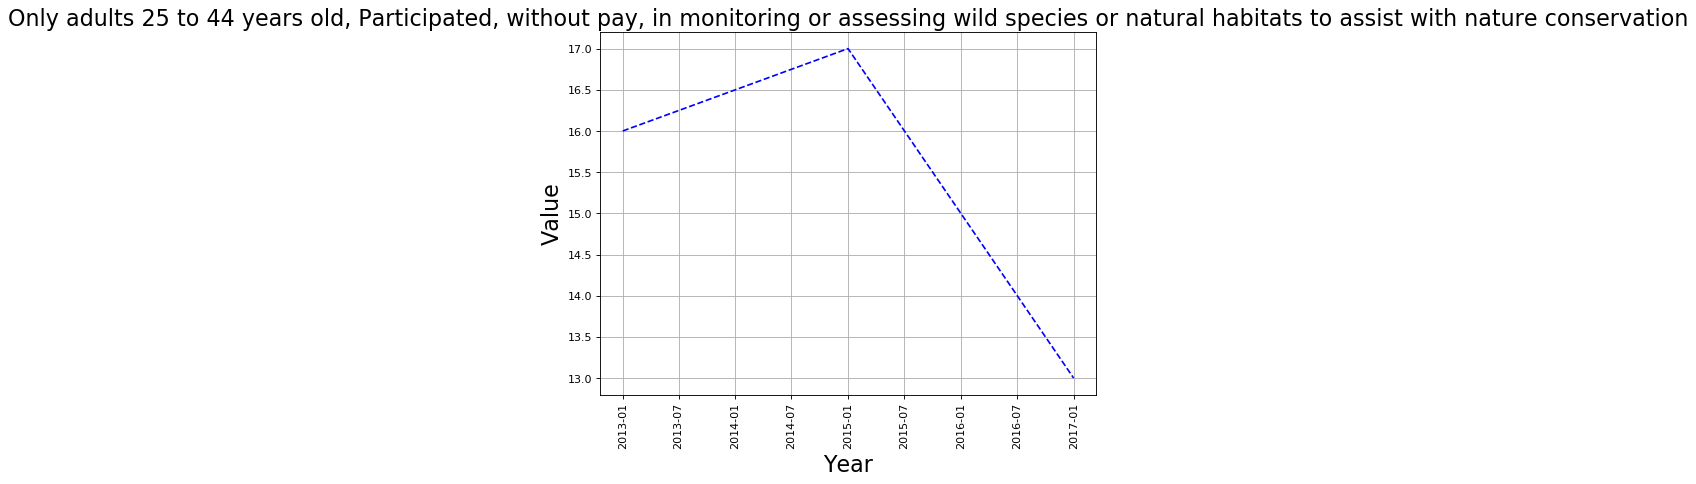

In [23]:
# Time to plot!
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import figure
register_matplotlib_converters()
%matplotlib inline

# Actual plot of time series
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Get start and end date, plot value found under "VALUE" command
plt.plot(sub_df["REF_DATE"],sub_df["VALUE"],'b--',label='Value')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Value',fontsize=20)
# Title changes depending on the subcategory explored
plt.title(str(all_the_widgets[0].value) + ", "+  str(all_the_widgets[1].value),fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)


In [46]:
all_data = pd.pivot_table(df_less2, values='VALUE', index=['Type of household'],columns=['Environmental engagement'], aggfunc=np.average)

In [47]:
all_data

Environmental engagement,"Did not engage, without pay, in activities aimed at conservation or protection of the environment or wildlife","Engaged, without pay, in activities aimed at conservation or protection of the environment or wildlife","Engaged, without pay, in activities aimed at conservation or protection of the environment or wildlife both on behalf of a group or organization and independently","Engaged, without pay, in activities aimed at conservation or protection of the environment or wildlife independently","Engaged, without pay, in activities aimed at conservation or protection of the environment or wildlife on behalf of a group or an organization","Engaged, without pay, in activities aimed at conservation or protection of the environment or wildlife only independently","Engaged, without pay, in activities aimed at conservation or protection of the environment or wildlife only on behalf of a group or an organization"
Type of household,,,,,,,
Adults and children from 0 to 12 years only,72.00,23.75,23.50,62.50,61.00,38.50,37.25
Adults and members from 0 to 19 only,65.75,30.00,23.75,51.75,70.50,28.50,46.75
Adults and teens from 13 to 19 years only,74.25,22.00,23.75,60.25,63.00,36.25,39.25
Only adults 20 to 24 years old,85.75,NaN,NaN,NaN,NaN,NaN,NaN
Only adults 25 to 44 years old,80.50,15.75,20.75,70.75,50.00,50.00,29.25
Only adults 45 to 64 years old,79.75,17.75,21.75,79.50,42.00,57.50,20.25
Only adults 65 years old and older,82.75,12.25,21.50,77.75,43.50,56.00,22.00
Other compositions,79.75,16.50,18.00,70.00,46.75,52.00,28.75


In [29]:
all_data2 = pd.pivot_table(df_less2, values='VALUE', index=['Type of household',"REF_DATE"],columns=['Environmental engagement'])

In [51]:
all_data2

Environmental engagement                                Did not engage, without pay, in activities aimed at conservation or protection of the environment or wildlife  \
Type of household                           REF_DATE                                                                                                                    
Adults and children from 0 to 12 years only 2011-01-01                                               71.0                                                               
                                            2013-01-01                                               72.0                                                               
                                            2015-01-01                                               74.0                                                               
                                            2017-01-01                                               71.0                                                               
Adults and members from 0 to 19 only        2011-01-01                                               61.0                                                               
                                            2013-01-01                                               59.0                                                               
                                            2015-01-01                                               69.0                                                               
                                            2017-01-01                                               74.0                                                               
Adults and teens from 13 to 19 years only   2011-01-01                                               74.0                                                               
                                            2013-01-01                                               74.0                                                               
                                            2015-01-01                                               74.0                                                               
                                            2017-01-01                                               75.0                                                               
Only adults 20 to 24 years old              2011-01-01                                               82.0                                                               
                                            2013-01-01                                               88.0                                                               
                                            2015-01-01                                               89.0                                                               
                                            2017-01-01                                               84.0                                                               
Only adults 25 to 44 years old              2011-01-01                                               80.0                                                               
                                            2013-01-01                                               77.0                                                               
                                            2015-01-01                                               82.0                                                               
                                            2017-01-01                                               83.0                                                               
Only adults 45 to 64 years old              2011-01-01                                               79.0                                                               
                                            2013-01-01                                               80.0        

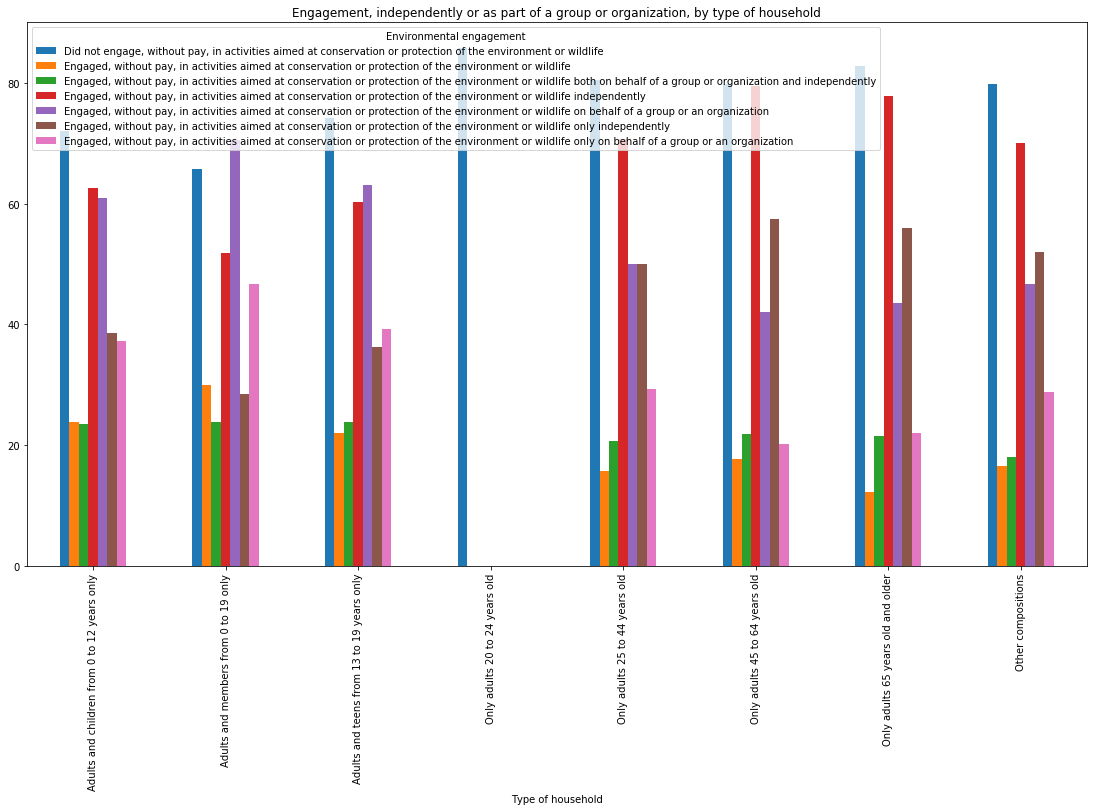

In [48]:
all_data.plot(kind='bar',figsize=(19,10),title="Engagement, independently or as part of a group or organization, by type of household");

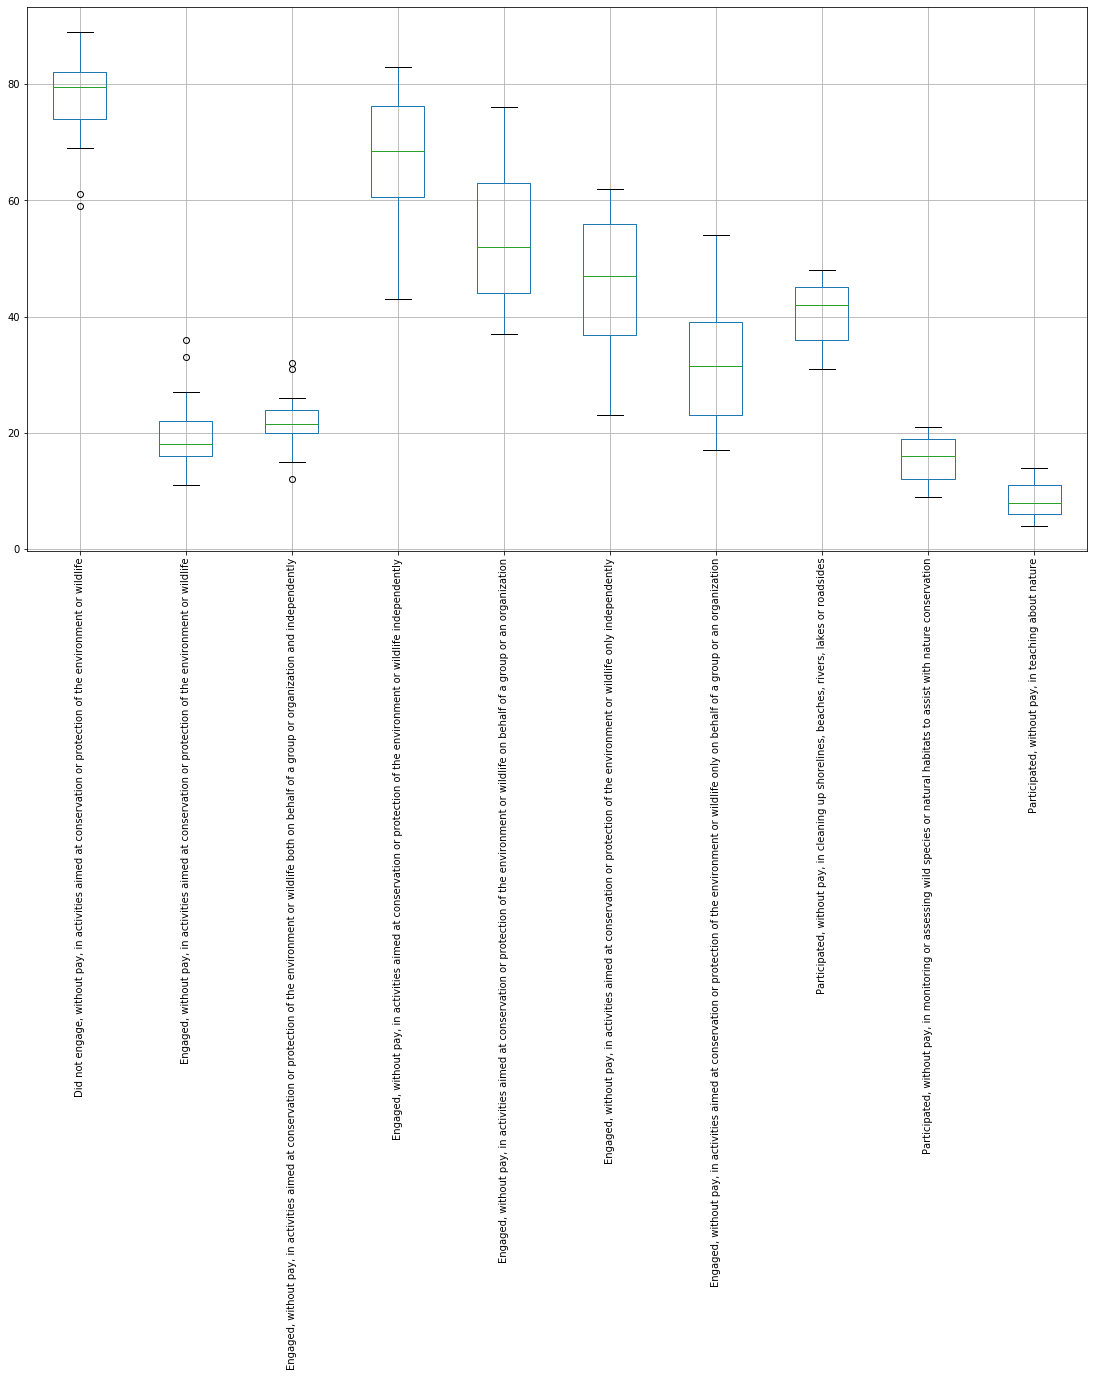

In [50]:
all_data2.boxplot(figsize=(19,10),rot=90); #

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)